In [1]:
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


This is a data driven study of grouping tasks


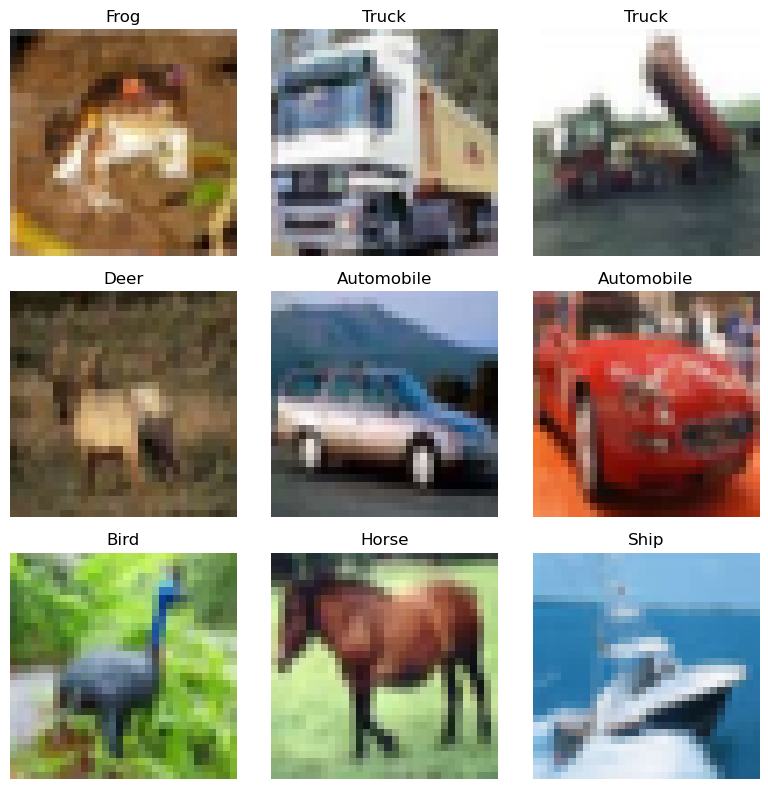

In [2]:
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to plot images with labels
def plot_images(images, labels, num_rows=3, num_cols=3):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))
    axes = axes.flatten()
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        ax.set_title(class_names[label[0]])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Select a few images to display
plot_images(x_train[:9], y_train[:9])


In [3]:
import numpy as np
unique_values = np.unique(y_train)

print(unique_values)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [5]:
y_train_one_hot[:20]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [6]:
y_train_one_hot[y_train_one_hot == 0] = -1

We look at the correlation matrix of the tasks to see how good a predictore it is of the pairing discovered in \grouping2023

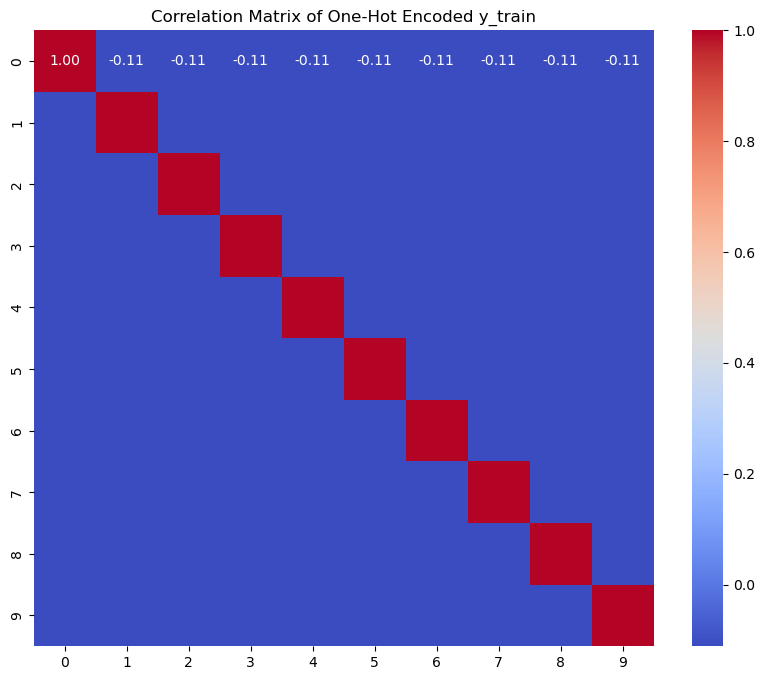

In [7]:

import seaborn as sns


# Calculate the correlation matrix
correlation_matrix = np.corrcoef(y_train_one_hot, rowvar=False)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of One-Hot Encoded y_train")
plt.show()


obviously the classes are mutually exclusive (and there is the same number of pictures in each class)

Next, we implement horizontal division (when the indices on which we define a topology are horizontal - ie we consider subsets of datapoints)

I. Inspired by the original example in sheaves for data,We pick a task of interest and 
A. Generate all the subsets build by all possible unions $U_i=\{j/y_{ji}=1$ with $j$ distinct of the task of interest. the function Subsets takes as input an integer $j$ and outputs all the length 10 boolean arrays with 0 in position $i-1$
B. For any such subset, we generate the $\Lambda_k$ filtration of $U$ which is a function called Filtrationk that takes as input an integer $k$ and a boolean array of length 10 with 1s for the "j" included in $U=\bigcup_j U_j$ and returning a list of ? 10-array where $?$ is a function of $k$. For $k=1$, it is 9 unless $U$ was already a one class subset in which case the output should be None.
C. For some determined $V$ (coded as length 10 Boolean array), the function $indices_V$ returns the array of indices for which $y_j=1$ for at least one of the $j$.s.t. $V_j=1$ 
D. The function SigmaXy of the DataBase class takes an index array "index" indicating the subsets of rows that we want to consider and an integer $i$ indicating which is the task of interest, and returning $1/len(index)y_i^TX$
E. For an input $U$ and an integer $k$ indicating the degree of filtration to consider, the function $Incon_k_U$ of the database class returns a list containing, for each column V in the k-filtration of $U$, a pair of a positive real $d=(SigmaXy(U),SigmaXy(V))$ of a 10-array indicating which $j$ have been removed of $U$ to produce $V$. It also returns a 10 array indicating for which removed $j´s$ the distance was maximum.
F. An helper function subsets that takes a 10 array representing $U$, and returns a list of arrays containing all possible arrays with 0 values in the same positions as the input and in position $j-1$.(except the array itself and the array of 0). The output should be a list of arrays.
G. The function Inconk takes an integer $k$ and an integer $i$ indicating which is the task of interest. It then computes for each $V$ outputed by subsets(U) incon_k_U(k,V) and counts for each $j´s$ array how many times it was associated with the highest inconsistency.
A function Histok that takes as input the output of the last function and returns an histogram with a bar for each 'at most k combinations of targets' how many times each of them is causing the biggest shift in the correlation matrix for a given task of interest.

In [86]:
from itertools import combinations
import random
"""Same without any priviledged task"""

class TopologicalFunctions:
    def __init__(self):
        """
        Initialize the TopologicalFunctions class 
        """
        

    def subsets(self, U, min_size=1, max_n=20):
        """
        Generate all possible arrays with 0 values in the same positions as the input U
         except  the array of 0s.

        Args:
        U (array): A 10-element array of 0s and 1s.

        Returns:
        list: A list of arrays that are variations of the input array U.
        """
        if len(U) != 10:
            raise ValueError("Input array U must be of length 10.")

        # Ensure the input array U is valid (only contains 0s and 1s)
        if not all(x in [0, 1] for x in U):
            raise ValueError("Input array U must only contain 0s and 1s.")

        # min_size should be smaller than the size of U
        if min_size>np.sum(U):
            raise ValueError("U must be bigger than min_size")

        # Generate all subsets of size at least min_size
        subsets = []
        for i in range(1, 1024):  # 1024 = 2^10, to generate all combinations
            candidate = [(i >> bit) & 1 for bit in range(10)]
            if all(candidate[k] <= U[k] for k in range(10)) and sum(candidate)>=min_size:
                subsets.append(np.array(candidate))
            
        if max_n<len(subsets):
            return random.sample(list(subsets), max_n)
        else:
            return list(subsets)
    def filtrationk(self, U, k):
        """
        Generate the Lambda_k filtration of U, returning a list of arrays that differ from U by at most k values,
         and 0s in all positions where U has 0s.
        The input array U is excluded from the output list.

        Args:
        U (list): A 10-element array of 0s and 1s, with a 0 in the j-1 position.
        k (int): The maximum number of differing values allowed in the filtration.

        Returns:
        list: A list of 10-element arrays, each differing from U by at most k values under the given conditions,
              excluding the input array U itself.
        """
        if len(U) != 10:
            raise ValueError("Input array U must be of length 10.")

        if not (0 <= k <= 10):
            raise ValueError("k must be an integer between 0 and 10.")

        
        # Generate the filtration
        filtration = []
        for i in range(1, 1024):  # 1024 = 2^10, to generate all combinations
            candidate = [(i >> bit) & 1 for bit in range(10)]
            differences = sum(candidate[i] != U[i] for i in range(10) if U[i] == 1)
            if differences <= k and not all(candidate[i] == U[i] for i in range(10)) and all(candidate[i] == 0 if U[i] == 0 else True for i in range(10)):
                filtration.append(np.array(candidate))

        return filtration
    
    

# Corrected example usage
topo = TopologicalFunctions()
corrected_example_U = [1, 0, 1, 0, 0, 0, 1, 0, 1, 0]  # Corrected U with a 0 in the 4th position
result_filtrationk = topo.filtrationk(corrected_example_U, 2)
result_filtrationk  # Displaying the result



def generate_arrays_list(k, n=10):
    """
    Generate a set of all numpy arrays of length n with at most k 1s.

    :param k: Maximum number of 1s in the array
    :param n: Length of the array
    :return: Set of all possible numpy arrays with at most k 1s
    """
    result_list = []
    for num_ones in range(k+1):  # 0 to k inclusive
        for indices in combinations(range(n), num_ones):
            array = np.zeros(n, dtype=int)
            array[list(indices)] = 1
            result_list.append(array)
    return result_list



In [9]:
generate_arrays_list(k=2, n=10)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0]),


In [10]:
for i in range(1, 4):  # 4 = 2^10, to generate all combinations
            candidate = [(i >> bit) & 1 for bit in range(10)]
            print(candidate)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [82]:

import networkx as nx
class DatabaseOperations:
    def __init__(self, x, y):
        """
        Initialize the DatabaseOperations class with a data matrix x, label matrix y, and an integer j indicating a class of interest.

        Args:
        x (numpy.ndarray): A n-dimensional array representing the data.
        y (numpy.ndarray): A 2-dimensional array with the same size in dim 0 as x, representing labels.
        
        """
        if not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray):
            raise ValueError("x and y must be numpy arrays.")

        if x.shape[0] != y.shape[0]:
            raise ValueError("x and y must have the same size in the first dimension.")

        

        self.x = x
        self.y = y
        self.filtration_function = TopologicalFunctions().filtrationk
        self.topo_funcs = TopologicalFunctions().subsets
        self.gen_set = generate_arrays_list
        self.class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

    def indicesV(self, V):
        """
        
        Args:
        V (list or numpy.ndarray): A 10-element array of 0s and 1s, with a 0 in the j-1 position.

        Returns:
        numpy.ndarray: A boolean array of length x.shape[0].
        """
        if len(V) != 10:
            raise ValueError("V must be a 10-element array.")

        
        # Create a boolean mask based on V and y
        mask = np.any(self.y[:, V == 1] == 1, axis=1)

        return mask
    
    def SigmaXy(self, index):
        """
        Filters rows of x using the provided boolean index array and calculates 1/x'.shape[0] * y^T * x',
        where x' is the filtered x. Flattens and unflattens x if it has more than 2 dimensions.

        Args:
        index (numpy.ndarray): A boolean array indicating the subset of rows to consider.

        Returns:
        numpy.ndarray: The calculated value of 1/x'.shape[0] * y[:,j]^T * x', unflattened to its original shape if needed.
        """
        if not isinstance(index, np.ndarray) :
            raise ValueError("index must be a numpy boolean array.")

        if len(index) != self.x.shape[0]:
            raise ValueError("index must be of the same length as the number of rows in x.")

        # Flatten x if it has more than 2 dimensions
        original_shape = self.x.shape
        if len(original_shape) > 2:
            x_flattened = self.x.reshape(original_shape[0], -1)
        else:
            x_flattened = self.x
        
        # Filter x and y based on the index
        x_filtered = x_flattened[index]
        y_filtered = self.y[index, :]  

        # Calculate the result
        if x_filtered.shape[0] == 0:
            return np.zeros(original_shape[1:])  # To handle division by zero

        result = np.dot(y_filtered.T, x_filtered) / x_filtered.shape[0]

        # Reshape the result to match the original shape of x, if it was flattened
        if len(original_shape) > 2:
            result = result.reshape((self.y.shape[1],) + original_shape[1:])

        return result
    
    

    def Incon_k_U(self, U, k, phi = None, dist_meas = None):
        """
        Computes incon_k_U for a given U and k. Generates listV = filtration_function(U, k).
        For each V in listV, computes the pair (dist, U-V), where dist is the Euclidean distance
        between SigmaXy(U) and SigmaXy(V).

        Args:
        U (numpy.ndarray): A 10-element array of 0s and 1s.
        k (int): The degree of filtration to consider.
        filtration_function (function): A function to generate the Lambda_k filtration of U.

        Returns:
        list: A list of pairs (dist, U-V).
        numpy.ndarray: A 10-element array indicating for which value of U-V the dist was maximum.
        """
        listV = self.filtration_function(U, k)

        results = []
        max_dist = 0
        max_diff = np.zeros(10)
        U_ind = self.indicesV(U)

        if phi == None:
            sigmaXy_U = self.SigmaXy(U_ind)
        else:
            sigmaXy_U = phi(U_ind)

        for V in listV:
            V_ind = self.indicesV(V)

            if phi == None:
                sigmaXy_V = self.SigmaXy(V_ind)
            else:
                sigmaXy_V = phi(V_ind)

            rows = sigmaXy_U.shape[0]
            sigma_U_mat = sigmaXy_U.reshape(rows,-1)
            sigma_V_mat = sigmaXy_V.reshape(rows,-1)
            if dist_meas == None:

                dist = np.linalg.norm(sigma_U_mat - sigma_V_mat,"fro")
            else:
                dist = dist_meas(sigma_U_mat, sigma_V_mat)
            diff = U - V
            results.append((dist, diff))

            if dist > max_dist:
                max_dist = dist
                max_diff = diff

        return results, max_diff, max_dist


    
    def multiIncon_k_U(self, U, k, phi=None, dist_meas_list=None):
        """
        Computes multiIncon_k_U for a given U and k with multiple distance measurement functions. 
        Generates listV = filtration_function(U, k).
        For each V in listV, and each distance measurement function in dist_meas_list, 
        computes the pair (dist, U-V), where dist is the distance between SigmaXy(U) and SigmaXy(V)
        measured by the distance function.

        Args:
        U (numpy.ndarray): A 10-element array of 0s and 1s.
        k (int): The degree of filtration to consider.
        phi (function): Optional transformation function for U and V indices.
        dist_meas_list (list of functions): A list of distance measurement functions.

        Returns:
        dict: A dictionary where keys are the names of functions in dist_meas_list and 
            values are triplets (results, max_diff, max_dist) computed for each function.
        """
        listV = self.filtration_function(U, k)
        U_ind = self.indicesV(U)
        sigmaXy_U = phi(U_ind) if phi else self.SigmaXy(U_ind)

        # Dictionary to store results for each distance measurement function
        all_results = {}

        for dist_meas in dist_meas_list:
            results = []
            max_dist = 0
            max_diff = np.zeros(10)

            for V in listV:
                V_ind = self.indicesV(V)
                sigmaXy_V = phi(V_ind) if phi else self.SigmaXy(V_ind)

                rows = sigmaXy_U.shape[0]
                sigma_U_mat = sigmaXy_U.reshape(rows, -1)
                sigma_V_mat = sigmaXy_V.reshape(rows, -1)

                dist = dist_meas(sigma_U_mat, sigma_V_mat) if dist_meas else np.linalg.norm(sigma_U_mat - sigma_V_mat, "fro")
                diff = U - V
                results.append((dist, diff))

                if dist > max_dist:
                    max_dist = dist
                    max_diff = diff

            # Store the results for the current distance measurement function
            function_name = dist_meas.__name__ if dist_meas else 'default'
            all_results[function_name] = (results, max_diff, max_dist)

        return all_results

    def incon_k(self, k, min_size=1, phi = None, dist_meas = None):
        # Generate the set S of all 10-arrays of 0s and 1s
        I = np.ones(10, dtype=int)
        S = self.topo_funcs(I, min_size)

        # Dictionary to keep track of the number of times each V is associated with the max distance
        S_k= self.gen_set(k)
        max_dist_count = {tuple(V): 0 for V in S_k}
        max_dist = {tuple(V): 0 for V in S_k}
        mean_discrep_l = {tuple(V): [] for V in S_k}
        mean_discrep = {tuple(V): 0 for V in S_k}
        # Iterate over each V in S
        print("S",S)
        for V in S:
            list_tup, max_diff, max_dis = self.Incon_k_U(V, k, phi, dist_meas)
            print(list_tup, max_diff,max_dis)
            max_diff_tuple = tuple(max_diff)
            max_dist_count[max_diff_tuple]+=1
            max_dist[max_diff_tuple]=max(max_dist[max_diff_tuple],max_dis)
            for tup in list_tup:
                mean_discrep_l[tuple(tup[1])].append(tup[0])
        mean_discrep = {key: (sum(value) / len(value)) if len(value) != 0 else 0 for key, value in mean_discrep_l.items()}
        return max_dist_count, max_dist, mean_discrep
    

        
    def multiIncon_k(self, k, min_size=1, phi=None, dist_meas_list=None):
        """
        Computes incon_k for a given k with multiple distance measurement functions. 
        Returns a dictionary where keys are the names of functions in dist_meas_list and 
        values are the outputs of incon_k computed with each respective function.

        Args:
        k (int): The degree of filtration to consider.
        min_size (int): Minimum size to consider in topo_funcs.
        phi (function): Optional transformation function for indices.
        dist_meas_list (list of functions): A list of distance measurement functions.

        Returns:
        dict: A dictionary where keys are the names of functions in dist_meas_list and 
            values are the outputs of incon_k computed for each function.
        """
        # Generate the set S of all 10-arrays of 0s and 1s
        I = np.ones(10, dtype=int)
        S = self.topo_funcs(I, min_size)

        # Initialize dictionary for results
        all_results = {}

        # Process each distance measurement function
        for dist_meas in dist_meas_list:
            S_k = self.gen_set(k)
            max_dist_count = {tuple(V): 0 for V in S_k}
            max_dist = {tuple(V): 0 for V in S_k}
            mean_discrep_l = {tuple(V): [] for V in S_k}

            # Iterate over each V in S
            for V in S:
                list_tup, max_diff, max_dis = self.multiIncon_k_U(V, k, phi, [dist_meas])[dist_meas.__name__]

                max_diff_tuple = tuple(max_diff)
                max_dist_count[max_diff_tuple] += 1
                max_dist[max_diff_tuple] = max(max_dist[max_diff_tuple], max_dis)

                for dist, diff in list_tup:
                    mean_discrep_l[tuple(diff)].append(dist)

            # Compute mean discrepancy
            mean_discrep = {key: (sum(value) / len(value)) if value else 0 for key, value in mean_discrep_l.items()}
            
            # Store the results for the current distance measurement function
            function_name = dist_meas.__name__
            all_results[function_name] = (max_dist_count, max_dist, mean_discrep)

        return all_results


    def multiIncon_k2(self, k, min_size=1, phi=None, dist_meas_list=None):
        """
        Optimized version of multiIncon_k which calls multiIncon_k_U only once for each V in S
        with all the distance measurement functions in dist_meas_list. Computes incon_k for each
        function and returns a dictionary of results.

        Args:
        k (int): The degree of filtration to consider.
        min_size (int): Minimum size to consider in topo_funcs.
        phi (function): Optional transformation function for indices.
        dist_meas_list (list of functions): A list of distance measurement functions.

        Returns:
        dict: A dictionary where keys are the names of functions in dist_meas_list and 
            values are the outputs of incon_k computed for each function.
        """
        # Generate the set S of all 10-arrays of 0s and 1s
        I = np.ones(10, dtype=int)
        S = self.topo_funcs(I, min_size)

        # Dictionary to store results for each distance measurement function
        all_results = {dist_meas.__name__: {'max_dist_count': {}, 'max_dist': {}, 'mean_discrep_l': {}} for dist_meas in dist_meas_list}

        # Process each V in S
        for V in S:
            multi_results = self.multiIncon_k_U(V, k, phi, dist_meas_list)

            for dist_meas in dist_meas_list:
                function_name = dist_meas.__name__
                list_tup, max_diff, max_dis = multi_results[function_name]

                # Convert max_diff to a tuple
                max_diff_tuple = tuple(max_diff)

                # Ensure the key exists in the dictionaries, initialize if not
                for result_dict in [all_results[function_name]['max_dist_count'],
                                    all_results[function_name]['max_dist']]:
                    if max_diff_tuple not in result_dict:
                        result_dict[max_diff_tuple] = 0

                all_results[function_name]['max_dist_count'][max_diff_tuple] += 1
                all_results[function_name]['max_dist'][max_diff_tuple] = max(all_results[function_name]['max_dist'][max_diff_tuple], max_dis)

                for dist, diff in list_tup:
                    diff_tuple = tuple(diff)

                    # Ensure the key exists in the mean_discrep_l dictionary
                    if diff_tuple not in all_results[function_name]['mean_discrep_l']:
                        all_results[function_name]['mean_discrep_l'][diff_tuple] = []

                    all_results[function_name]['mean_discrep_l'][diff_tuple].append(dist)

        # Compute mean discrepancy for each function
        # ... [rest of your function code] ...


            # Compute mean discrepancy for each function
        for function_name in all_results:
            mean_discrep = {key: (sum(value) / len(value)) if value else 0 for key, value in all_results[function_name]['mean_discrep_l'].items()}
            all_results[function_name]["mean_discrep_l"] = mean_discrep
            #all_results[function_name] = (all_results[function_name]['max_dist_count'], all_results[function_name]['max_dist'], mean_discrep)

        return all_results
    def compute_sigma_by_class(self, class_names):
        """
        Compute the SigmaXy value for each class and return a dictionary with class names as keys.

        Args:
        class_names (list of str): List of class names corresponding to each of the 10 positions.

        Returns:
        dict: Dictionary with class names as keys and SigmaXy values as values.
        """
        if len(class_names) != 10:
            raise ValueError("class_names must have 10 elements.")

        sigma_dict = {}
        for i in range(10):
            # Create an array with one 1 at position i and 0s elsewhere
            V = np.zeros(10, dtype=int)
            V[i] = 1

            # Calculate the index
            index = self.indicesV(V)

            # Compute SigmaXy for this index
            sigma_value = self.SigmaXy(index)

            # Store in dictionary with class name as key
            sigma_dict[class_names[i]] = sigma_value

        return sigma_dict
    
    def create_frobenius_graph(self):
        """
        Create a graph where each vertex is a class name, and edges represent the Frobenius distances 
        between the matrices corresponding to the vertices.
        """
        # Assuming class_names is a class attribute or can be obtained somehow
        sigma_values = self.compute_sigma_by_class(self.class_names)

        # Create a graph
        G = nx.Graph()

        # Add nodes
        for class_name in self.class_names:
            G.add_node(class_name)

        # Add edges with Frobenius distances
        for i, class_name1 in enumerate(self.class_names):
            for j, class_name2 in enumerate(self.class_names):
                if i < j:  # To avoid duplicate edges and self-loops
                    distance = np.linalg.norm(sigma_values[class_name1] - sigma_values[class_name2])
                    G.add_edge(class_name1, class_name2, weight=distance)

        # Draw and display the graph
        self._draw_graph(G)

    def _draw_graph(self, G):
        """
        Draw and display a graph G using matplotlib, interpreting edge weights as distances.

        Args:
        G (networkx.Graph): A NetworkX graph object.
        """
        plt.figure(figsize=(10, 8))

        # Use the spring layout with weights, interpreting them as distances
        pos = nx.spring_layout(G, weight='weight')

        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_size=700)

        # Draw edges
        nx.draw_networkx_edges(G, pos, width=2)

        # Draw node labels
        nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

        plt.title("Graph with Edge Weights as Distances")
        plt.axis('off')
        plt.show()


In [30]:
'''7 dist_meas functions for svd decompositions'''
from scipy.linalg import subspace_angles
from scipy.linalg import orthogonal_procrustes
from scipy.spatial.distance import jensenshannon
from scipy.stats import wasserstein_distance
'''This function will compute the Euclidean distance between the singular value vectors 
of two matrices.'''
def svd_singular_value_difference(A, B):
    singular_values_A = np.linalg.svd(A, compute_uv=False)
    singular_values_B = np.linalg.svd(B, compute_uv=False)
    return np.linalg.norm(singular_values_A - singular_values_B)

'''This function will compute the principal angles between the subspaces spanned by
 the left singular vectors of two matrices and return the sum of cosine of these 
 angles.'''
def subspace_angle_distance(A, B):
    U_A, _, _ = np.linalg.svd(A, full_matrices=False)
    U_B, _, _ = np.linalg.svd(B, full_matrices=False)
    angles = subspace_angles(U_A, U_B)
    return np.sum(np.cos(angles))

'''This function will measure how closely the subspaces spanned by 
the singular vectors of one matrix can be made to align with those of the other.'''
def procrustes_distance(A, B):
    U_A, _, _ = np.linalg.svd(A, full_matrices=False)
    U_B, _, _ = np.linalg.svd(B, full_matrices=False)
    R, scale = orthogonal_procrustes(U_A, U_B)
    return np.linalg.norm(U_A @ R - U_B)

'''This function computes the Frobenius norm
 of the difference between low-rank approximations of two matrices.'''
def frobenius_norm_difference_approximations(A, B):
    k=2
    U_A, s_A, Vt_A = np.linalg.svd(A, full_matrices=False)
    U_B, s_B, Vt_B = np.linalg.svd(B, full_matrices=False)
    A_k = np.dot(U_A[:, :k], np.dot(np.diag(s_A[:k]), Vt_A[:k, :]))
    B_k = np.dot(U_B[:, :k], np.dot(np.diag(s_B[:k]), Vt_B[:k, :]))
    return np.linalg.norm(A_k - B_k, 'fro')

'''This function computes the cosine similarity between 
the singular vectors of two matrices.'''
def cosine_similarity_singular_vectors(A, B):
    _, _, Vt_A = np.linalg.svd(A, full_matrices=False)
    _, _, Vt_B = np.linalg.svd(B, full_matrices=False)
    cos_sim = np.dot(Vt_A.flatten(), Vt_B.flatten()) / (np.linalg.norm(Vt_A) * np.linalg.norm(Vt_B))
    return cos_sim


'''This function computes the Jensen-Shannon divergence between the normalized
 singular values of two matrices.'''
def jensen_shannon_divergence(A, B):
    singular_values_A = np.linalg.svd(A, compute_uv=False)
    singular_values_B = np.linalg.svd(B, compute_uv=False)
    normalized_A = singular_values_A / np.sum(singular_values_A)
    normalized_B = singular_values_B / np.sum(singular_values_B)
    return jensenshannon(normalized_A, normalized_B)

'''This function computes the Earth Mover’s Distance between the distributions
 of singular values of two matrices.'''
def earth_movers_distance(A, B):
    singular_values_A = np.linalg.svd(A, compute_uv=False)
    singular_values_B = np.linalg.svd(B, compute_uv=False)
    return wasserstein_distance(singular_values_A, singular_values_B)




In [22]:
import matplotlib.pyplot as plt

def histo(dictionary, class_names):
    """
    Takes a dictionary where keys are 10-arrays and values are integers. 
    Maps each array to a tuple of words from class_names.
    Plots a histogram with the height of the bars determined by the values and x-axis labeled by the tuples.

    Args:
    dictionary (dict): A dictionary with keys as 10-arrays and values as integers.
    class_names (list): A list of class names corresponding to each index in the 10-arrays.
    """
    # Mapping each key to a tuple of class names
    label_mapping = {key: tuple(class_names[i] for i in range(len(key)) if key[i] == 1) for key in dictionary.keys()}

    # Preparing data for the histogram
    labels = label_mapping.values()
    heights = dictionary.values()

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(dictionary)), heights, tick_label=[', '.join(label) for label in labels])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Classes')
    plt.ylabel('Values')
    plt.title('Histogram of Class Combinations')
    plt.tight_layout()
    plt.show()

In [87]:
db = DatabaseOperations(x_train,y_train_one_hot)

In [16]:
index=db.indicesV(np.array([1,0,0,0,0,0,0,0,0,0]))
corr_test=db.SigmaXy(index)
corr_test.shape

(10, 32, 32, 3)

In [17]:
db.indicesV(np.array([1,0,0,0,0,0,0,0,0,0]))

array([False, False, False, ..., False, False, False])

In [33]:
db.Incon_k_U(np.array([1,1,1,1,1,1,1,1,1,1]),k=1,dist_meas=svd_singular_value_difference)

([(0.1509364236596173, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])),
  (0.5655569694171821, array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])),
  (0.3885623090843006, array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])),
  (1.1121684167836543, array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])),
  (0.4925614066595353, array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])),
  (0.8113162948739664, array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])),
  (0.5587662410476415, array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])),
  (0.3782407283805856, array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])),
  (0.5031243042974037, array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])),
  (1.096679718871235, array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))],
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 1.1121684167836543)

In [34]:
db.multiIncon_k_U(np.array([1,1,1,1,1,1,1,1,1,1]),k=1,dist_meas_list=[svd_singular_value_difference,cosine_similarity_singular_vectors])

{'svd_singular_value_difference': ([(0.1509364236596173,
    array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])),
   (0.5655569694171821, array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])),
   (0.3885623090843006, array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])),
   (1.1121684167836543, array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])),
   (0.4925614066595353, array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])),
   (0.8113162948739664, array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])),
   (0.5587662410476415, array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])),
   (0.3782407283805856, array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])),
   (0.5031243042974037, array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])),
   (1.096679718871235, array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))],
  array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
  1.1121684167836543),
 'cosine_similarity_singular_vectors': ([(-0.12118524943035866,
    array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])),
   (-0.1145030109434203, array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])),
   (0.435396685839299, array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])),
   (0.6650130845925545,

In [37]:
db.incon_k(k=1,min_size=10,dist_meas=svd_singular_value_difference)

S [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]
[(0.1509364236596173, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])), (0.5655569694171821, array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])), (0.3885623090843006, array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])), (1.1121684167836543, array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])), (0.4925614066595353, array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])), (0.8113162948739664, array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])), (0.5587662410476415, array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])), (0.3782407283805856, array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])), (0.5031243042974037, array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])), (1.096679718871235, array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))] [0 0 0 0 0 0 1 0 0 0] 1.1121684167836543


({(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
  (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
  (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 0,
  (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 0,
  (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 0,
  (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 0,
  (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 0,
  (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 0,
  (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 0,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 0},
 {(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
  (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
  (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 0,
  (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 0,
  (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 0,
  (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 0,
  (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 0,
  (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 1.1121684167836543,
  (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 0,
  (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 0,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 0},
 {(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
  (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 1.096679718871235,
  (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 0.5031243042974037,
  (0, 0, 1, 0, 0, 0, 0,

In [40]:
db.multiIncon_k(k=1,min_size=10,dist_meas_list=[cosine_similarity_singular_vectors,svd_singular_value_difference])

{'cosine_similarity_singular_vectors': ({(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 0,
   (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 1,
   (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 0,
   (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 0,
   (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 0,
   (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 0,
   (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 0,
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 0},
  {(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 0,
   (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 0.6945019327812759,
   (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 0,
   (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 0,
   (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 0,
   (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 0,
   (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 0,
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 0},
  {(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0.22813057776950108,
   (0, 1, 0, 

In [59]:
db.multiIncon_k2(k=1,min_size=10,dist_meas_list=[cosine_similarity_singular_vectors,svd_singular_value_difference])

{'cosine_similarity_singular_vectors': {'max_dist_count': {(0,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0): 1},
  'max_dist': {(0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 0.6945019327812759},
  'mean_discrep_l': {(0, 0, 0, 0, 0, 0, 0, 0, 0, 1): -0.12118524943035866,
   (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): -0.1145030109434203,
   (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 0.435396685839299,
   (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 0.6650130845925545,
   (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 0.6389256218110616,
   (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 0.642263073122521,
   (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 0.6945019327812759,
   (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 0.37430731707836284,
   (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 0.38722479083334904,
   (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0.22813057776950108}},
 'svd_singular_value_difference': {'max_dist_count': {(0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0): 1},
  'max_dist': {(0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 1.1121684167836543},
  'mean_discrep_l': {(0, 0, 0, 0,

In [25]:
db.multiIncon_k(k=1,min_size=10,dist_meas_list=[cosine_similarity_singular_vectors,svd_singular_value_difference])

TypeError: unhashable type: 'numpy.ndarray'

note that lookng only at 1 filtration, cars go with animals, but looking at 2 filtrations, no.

In [61]:
dic_1filtrations = db.multiIncon_k(k=1,min_size=6,dist_meas_list=function_names)

In [65]:
def sum_values_by_index(dictionary, class_names):
    # Initialize the output dictionary with class names as keys and 0 as initial values
    sums_by_class = {name: 0 for name in class_names}

    # Iterate through each key-value pair in the dictionary
    for key, value in dictionary.items():
        # Iterate through each element in the key tuple
        for i, element in enumerate(key):
            # If the element is 1, add the value to the corresponding class sum
            if element == 1:
                sums_by_class[class_names[i]] += value

    return sums_by_class



# Class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def process_nested_dictionaries(input_dict, class_names):
    # Initialize the output dictionary
    processed_dict = {}

    # Iterate through each key-value pair in the input dictionary
    for key, nested_dict in input_dict.items():
        # Apply sum_values_by_index to each dictionary in the nested dictionary
        processed_sub_dict = {"count":sum_values_by_index(nested_dict[0], class_names),
                              "max":sum_values_by_index(nested_dict[1], class_names),
                              "mean":sum_values_by_index(nested_dict[2], class_names),
                              }
        
        # Store the processed sub-dictionary in the output dictionary
        processed_dict[key] = processed_sub_dict

    return processed_dict

In [69]:
dic_1filtrations

{'svd_singular_value_difference': ({(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 4,
   (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 0,
   (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 1,
   (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 10,
   (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 0,
   (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 25,
   (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 0,
   (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 0,
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 0},
  {(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 1.8040311756721683,
   (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 0,
   (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 1.4162152835447075,
   (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 2.3476602526855594,
   (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 0,
   (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 2.724533652264221,
   (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 0,
   (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 0,
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 0},
  {(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
   (1, 0, 0, 0, 0, 0, 

In [70]:
dic1plot = process_nested_dictionaries(dic_1filtrations, class_names)

In [71]:
dic1plot

{'svd_singular_value_difference': {'count': {'Airplane': 4,
   'Automobile': 0,
   'Bird': 0,
   'Cat': 1,
   'Deer': 10,
   'Dog': 0,
   'Frog': 25,
   'Horse': 0,
   'Ship': 0,
   'Truck': 0},
  'max': {'Airplane': 1.8040311756721683,
   'Automobile': 0,
   'Bird': 0,
   'Cat': 1.4162152835447075,
   'Deer': 2.3476602526855594,
   'Dog': 0,
   'Frog': 2.724533652264221,
   'Horse': 0,
   'Ship': 0,
   'Truck': 0},
  'mean': {'Airplane': 1.5126770304727921,
   'Automobile': 1.043685851158958,
   'Bird': 0.8522100286475643,
   'Cat': 1.1728071550883568,
   'Deer': 1.572998849544459,
   'Dog': 1.0121476734649992,
   'Frog': 2.0783147493548015,
   'Horse': 0.8951684382015448,
   'Ship': 0.6718300722772473,
   'Truck': 0.4095119508169216}},
 'subspace_angle_distance': {'count': {'Airplane': 0,
   'Automobile': 0,
   'Bird': 0,
   'Cat': 0,
   'Deer': 0,
   'Dog': 0,
   'Frog': 0,
   'Horse': 5,
   'Ship': 8,
   'Truck': 27},
  'max': {'Airplane': 0,
   'Automobile': 0,
   'Bird': 0,
   'C

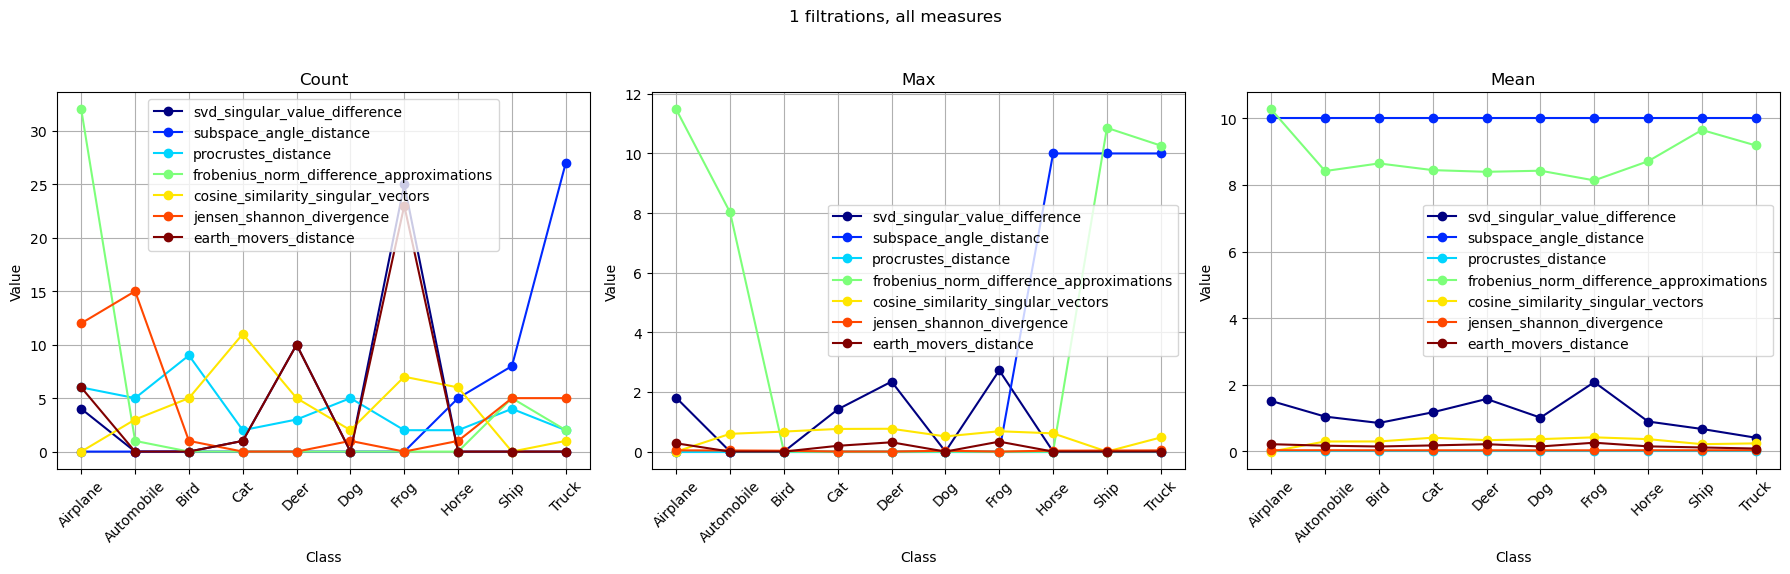

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def plot_three_dicts_side_by_side(input_dict, class_names, sup_title):
    # Set up the matplotlib figure with three subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    subkeys = ['count', 'max', 'mean']

    # Generate a color palette
    colors = plt.cm.jet(np.linspace(0, 1, len(input_dict)))

    # Titles for the subplots
    titles = ['Count', 'Max', 'Mean']

    # Iterate over each subkey and plot the corresponding graph
    for i, key in enumerate(subkeys):
        for j, (main_key, sub_dict) in enumerate(input_dict.items()):
            values = [sub_dict[key].get(class_name, 0) for class_name in class_names]
            axes[i].plot(class_names, values, 'o-', color=colors[j], label=main_key)

        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Class')
        axes[i].set_ylabel('Value')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True)
        axes[i].legend()

    # Set the common super title
    plt.suptitle(sup_title)

    # Adjust layout for better display
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example Usage:
# Assuming you have an input dictionary named 'input_dict' and class_names as defined
# plot_three_dicts_side_by_side(input_dict, class_names, "Super Title")
plot_three_dicts_side_by_side(dic1plot,class_names, "1 filtrations, all measures")

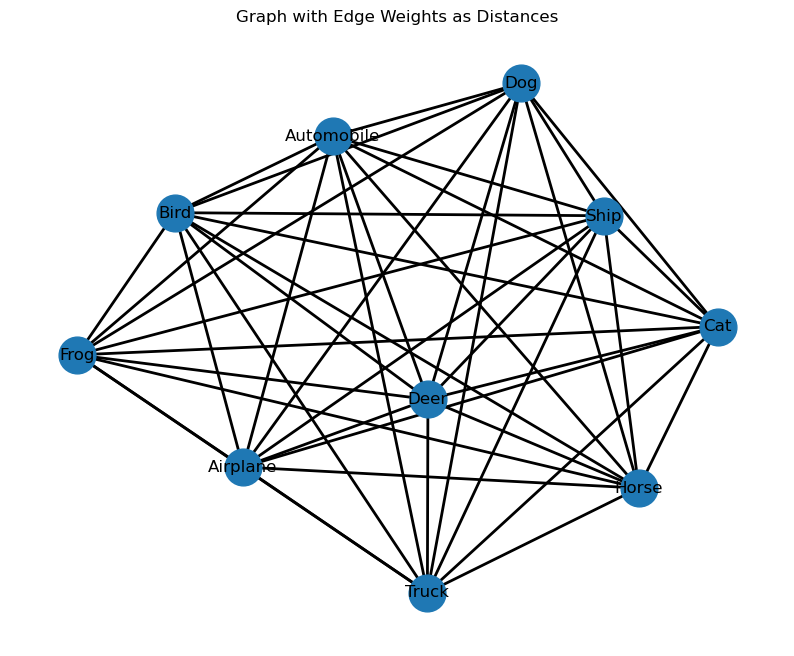

In [84]:
db.create_frobenius_graph()

As we can see from this graph, the trivail method of comparaison gives no clues about clustering

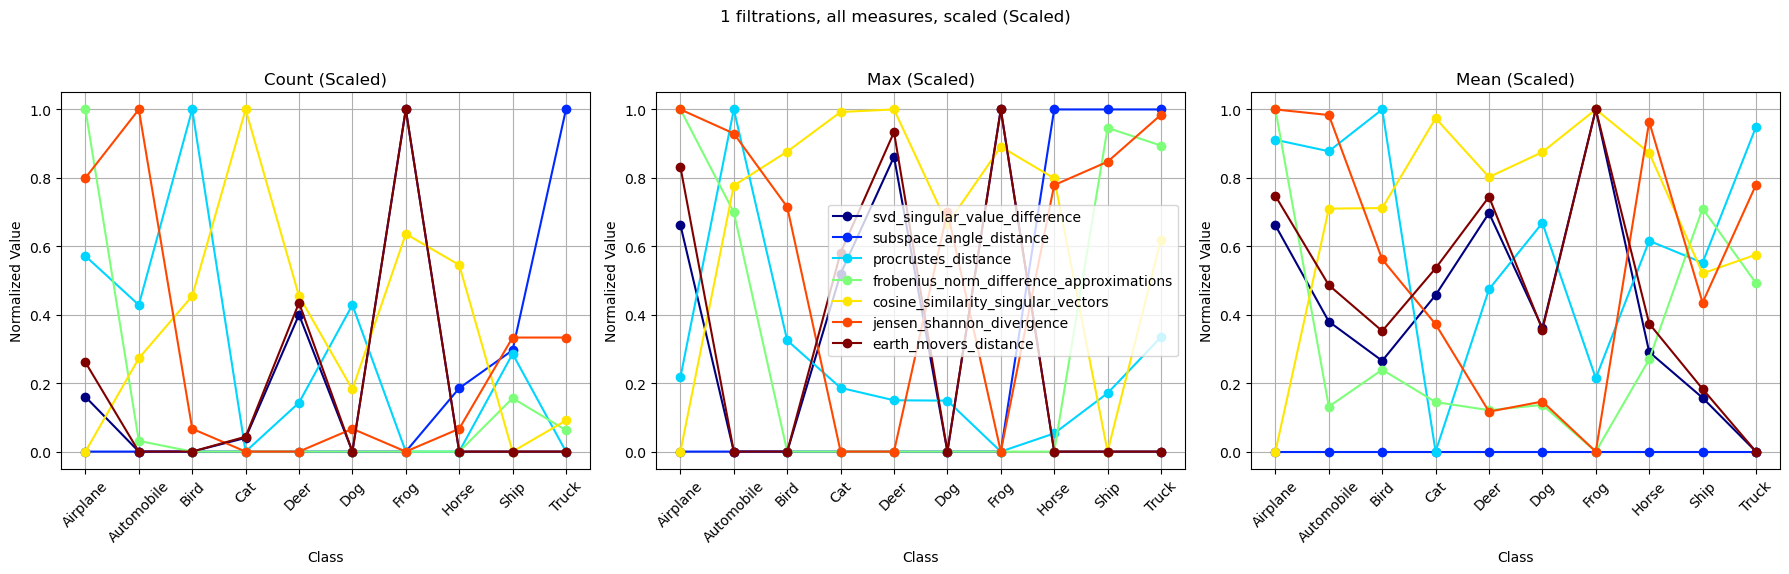

In [73]:
def normalize_values(values):
    min_val = min(values)
    max_val = max(values)
    if max_val - min_val == 0:  # Avoid division by zero
        return [0]*len(values)
    return [(val - min_val) / (max_val - min_val) for val in values]

def plot_three_dicts_side_by_side_scaled(input_dict, class_names, sup_title):
    # Set up the matplotlib figure with three subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    subkeys = ['count', 'max', 'mean']

    # Generate a color palette
    colors = plt.cm.jet(np.linspace(0, 1, len(input_dict)))

    # Titles for the subplots
    titles = ['Count', 'Max', 'Mean']

    # Iterate over each subkey and plot the corresponding graph
    for i, key in enumerate(subkeys):
        for j, (main_key, sub_dict) in enumerate(input_dict.items()):
            values = [sub_dict[key].get(class_name, 0) for class_name in class_names]
            normalized_values = normalize_values(values)
            axes[i].plot(class_names, normalized_values, 'o-', color=colors[j], label=main_key)

        axes[i].set_title(titles[i] + ' (Scaled)')
        axes[i].set_xlabel('Class')
        axes[i].set_ylabel('Normalized Value')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True)
    axes[1].legend()

    # Set the common super title
    plt.suptitle(sup_title + ' (Scaled)')

    # Adjust layout for better display
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_three_dicts_side_by_side_scaled(dic1plot,class_names, "1 filtrations, all measures, scaled")

jensen-shannon divergence indicates the clusters we are looking for based on semantic knowledge, both when counting the number of time suppressing a subclass leads to the biggest inconsistency and counting the total max discrepancy associated. Froebenius difference of approximations is also indformative with the max.

In [62]:
import pickle
import os


The same for 2 filtrations

In [88]:
dic_2filtrations = db.multiIncon_k(k=2,min_size=7,dist_meas_list=function_names)

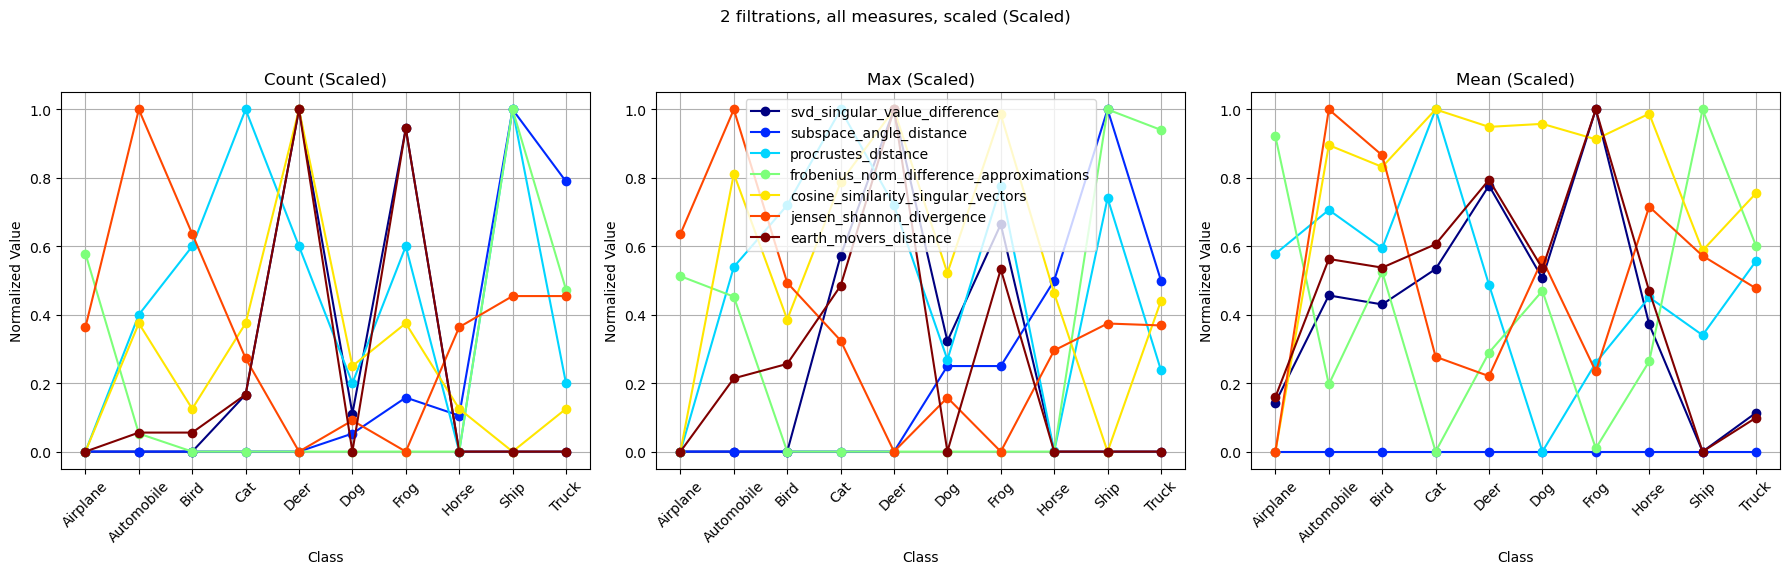

In [89]:
with open(os.path.join(data_directory, 'dic2filtration_l.pkl'), 'wb') as file:
    pickle.dump(dic_2filtrations, file)
dic2plot = process_nested_dictionaries(dic_2filtrations, class_names)
plot_three_dicts_side_by_side_scaled(dic2plot,class_names, "2 filtrations, all measures, scaled")

In [63]:

# Create a 'data' subdirectory in the current notebook directory
data_directory = './data'
os.makedirs(data_directory, exist_ok=True)

# Assuming dic_count_l, dic_max_l, dic_mean_l are your lists of dictionaries
# Replace these with your actual lists


In [64]:
with open(os.path.join(data_directory, 'dic1filtration_l.pkl'), 'wb') as file:
    pickle.dump(dic_1filtrations, file)

In [ ]:

# Save dic_count_l using pickle
with open(os.path.join(data_directory, 'dic_count_l.pkl'), 'wb') as file:
    pickle.dump(dic_count_l, file)

# Save dic_max_l using pickle
with open(os.path.join(data_directory, 'dic_max_l.pkl'), 'wb') as file:
    pickle.dump(dic_max_l, file)

# Save dic_mean_l using pickle
with open(os.path.join(data_directory, 'dic_mean_l.pkl'), 'wb') as file:
    pickle.dump(dic_mean_l, file)



In [60]:
function_names = [
    svd_singular_value_difference,
    subspace_angle_distance,
    procrustes_distance,
    frobenius_norm_difference_approximations,
    cosine_similarity_singular_vectors,
    jensen_shannon_divergence,
    earth_movers_distance]



In [147]:
dist_measure_names = [
    "svd_singular_value_difference",
    "subspace_angle_distance",
    "procrustes_distance",
    "frobenius_norm_difference_approximations",
    "cosine_similarity_singular_vectors",
    "jensen_shannon_divergence",
    "earth_movers_distance"
]

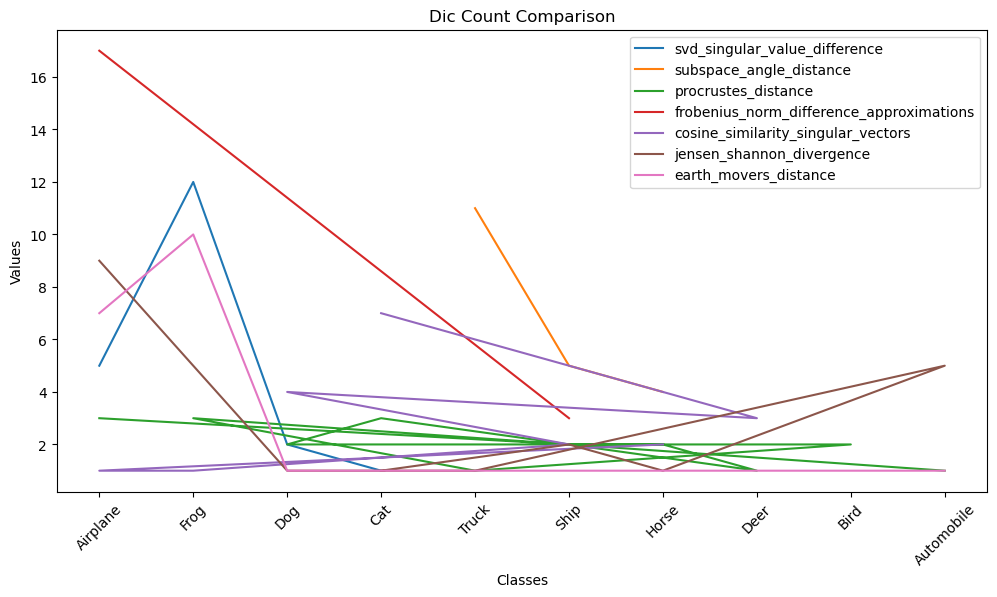

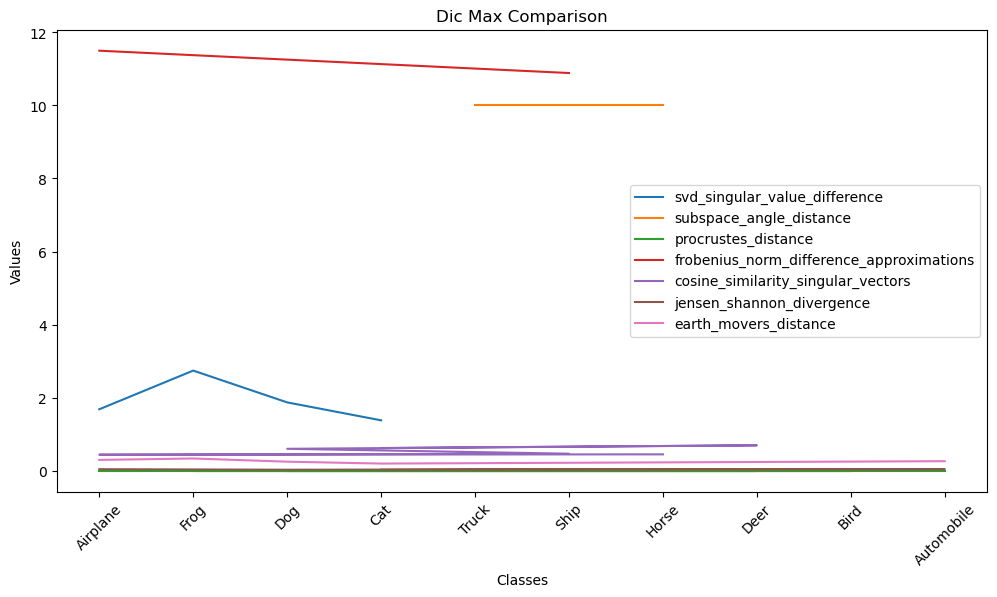

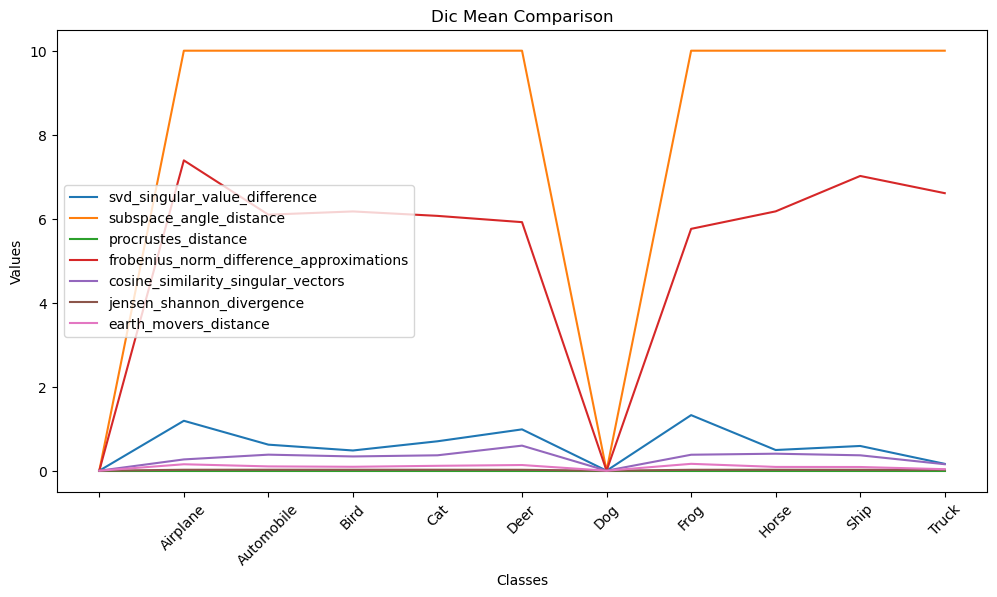

In [149]:
import matplotlib.pyplot as plt

# Class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to map keys (arrays) to class names
def map_keys_to_class_names(keys):
    mapped_keys = []
    for key in keys:
        # Use tuple directly as a mask to filter class names
        filtered_class_names = [class_names[i] for i in range(len(key)) if key[i] == 1]
        mapped_keys.append(', '.join(filtered_class_names))
    return mapped_keys

# ... rest of your code ...


# Modified function to plot a list of dictionaries with class names as x labels
def plot_dicts(dicts_list, labels, title):
    plt.figure(figsize=(12, 6))
    for i, d in enumerate(dicts_list):
        keys = list(d.keys())
        mapped_keys = map_keys_to_class_names(keys)
        values = list(d.values())
        plt.plot(mapped_keys, values, label=labels[i])
    plt.xlabel('Classes')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()

# Example usage with dic_count_l, dic_max_l, dic_mean_l
plot_dicts(dic_count_l, dist_measure_names, "Dic Count Comparison")
plot_dicts(dic_max_l, dist_measure_names, "Dic Max Comparison")
plot_dicts(dic_mean_l, dist_measure_names, "Dic Mean Comparison")


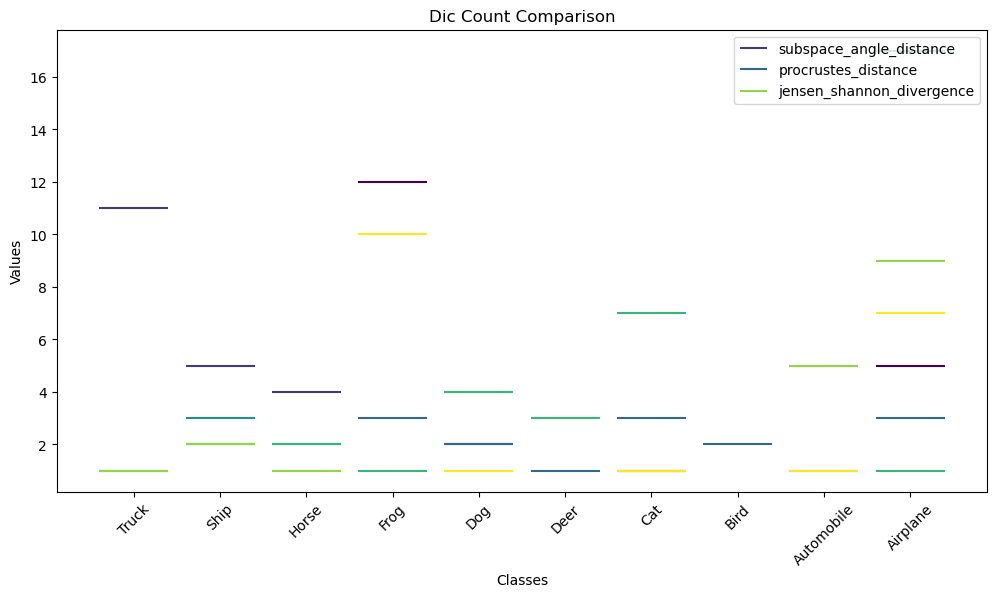

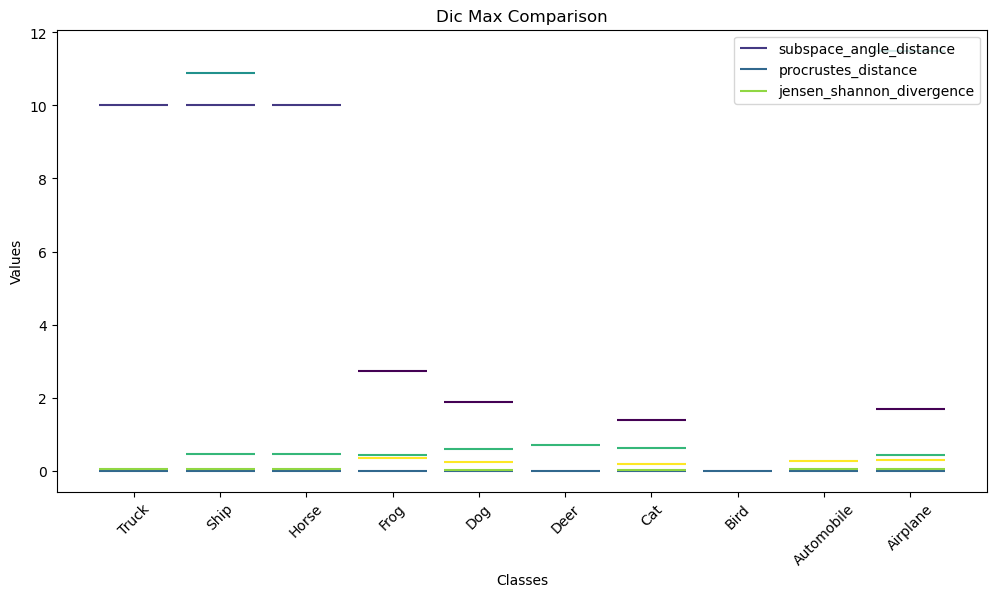

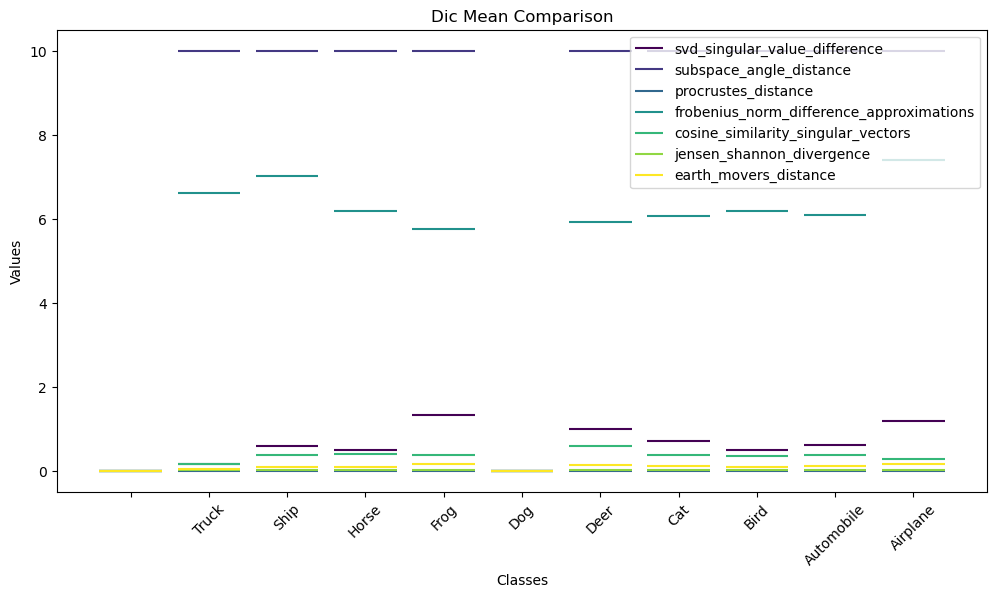

In [153]:
def plot_dicts_as_segments(dicts_list, labels, title):
    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(dicts_list)))  # Generate distinct colors

    # Calculate the total number of keys across all dictionaries
    total_keys = set()
    for d in dicts_list:
        total_keys.update(d.keys())
    total_keys = sorted(total_keys)

    for i, (d, color) in enumerate(zip(dicts_list, colors)):
        for key, value in d.items():
            # Find the position of this key in the total_keys list
            if key in total_keys:
                x_position = total_keys.index(key)
                # Draw horizontal line for each value
                plt.hlines(y=value, xmin=x_position - 0.4, xmax=x_position + 0.4, colors=color, label=labels[i] if key == total_keys[0] else "")

    plt.xlabel('Classes')
    plt.ylabel('Values')
    plt.title(title)
    plt.xticks(range(len(total_keys)), [', '.join(map_keys_to_class_names([k])) for k in total_keys], rotation=45)
    plt.legend()
    plt.show()

# Example usage (make sure dic_count_l, dic_max_l, dic_mean_l are loaded in your environment)
plot_dicts_as_segments(dic_count_l, dist_measure_names, "Dic Count Comparison")
plot_dicts_as_segments(dic_max_l, dist_measure_names, "Dic Max Comparison")
plot_dicts_as_segments(dic_mean_l, dist_measure_names, "Dic Mean Comparison")




In [156]:
dic_mean_l[4]

{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
 (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0.2684836394163587,
 (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 0.38189068209312704,
 (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 0.33914932870717174,
 (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 0.3666515774350032,
 (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 0.5967224946934577,
 (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 0,
 (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 0.380083633895908,
 (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 0.40468633416566047,
 (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 0.36643976043357956,
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 0.1543673908332591}

In [167]:
dic_count_l2, dic_max_l2, dic_mean_l2 = db.incon_k(k=1,min_size=6,dist_meas_list=function_names)

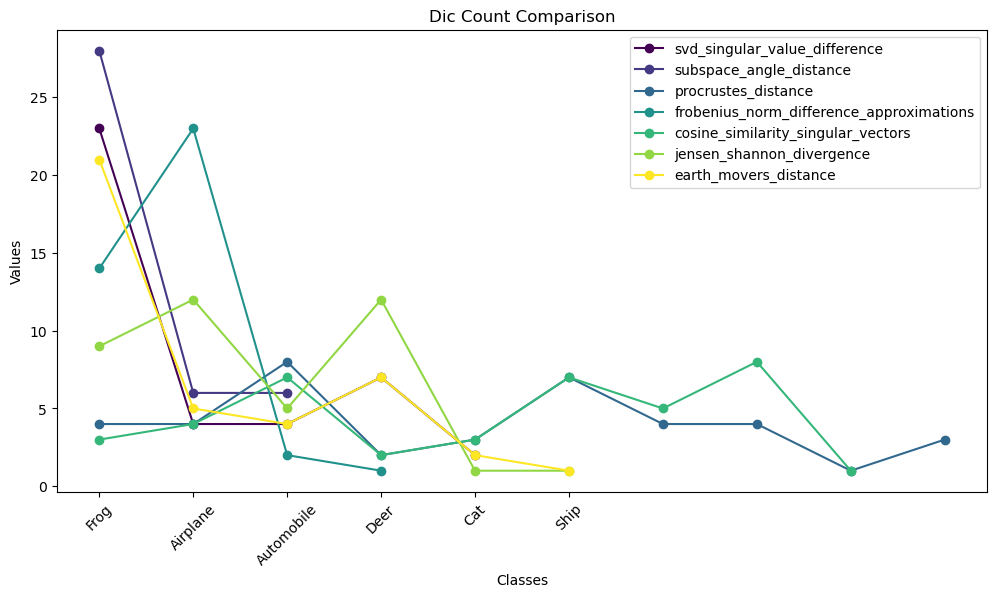

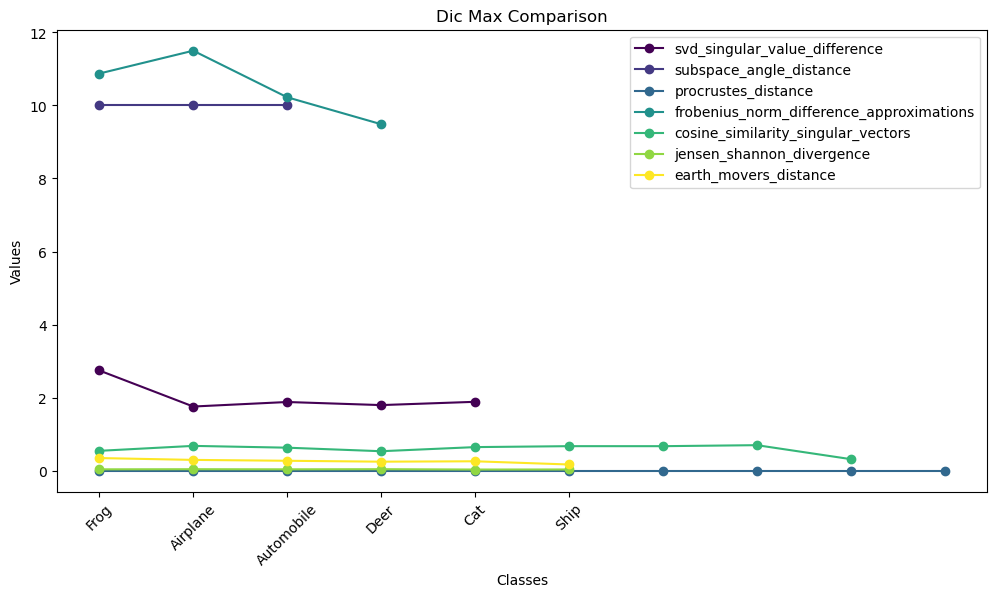

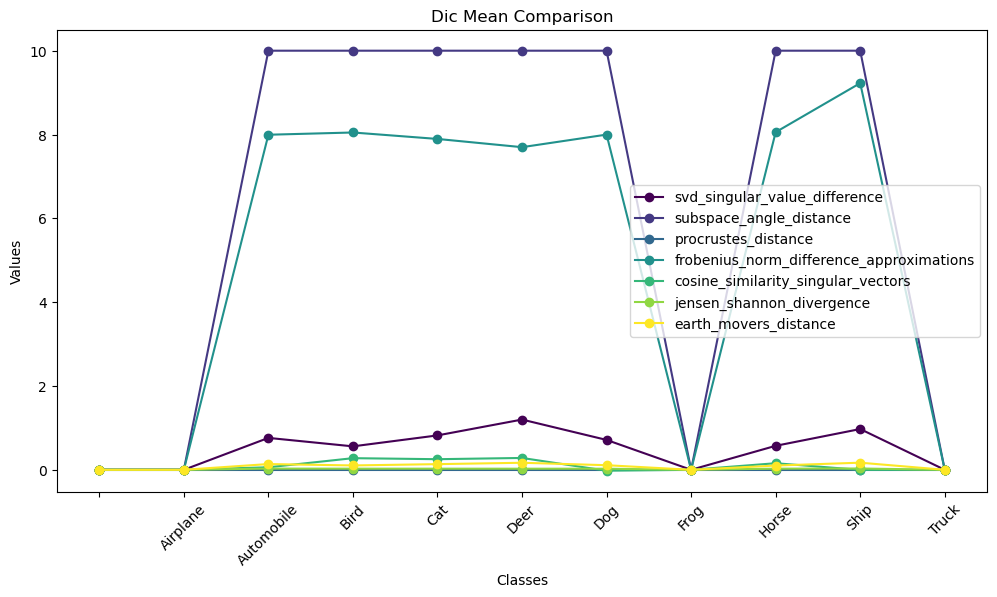

In [168]:
def plot_dicts_with_dots(dicts_list, labels, title):
    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(dicts_list)))  # Generate distinct colors

    for i, (d, color) in enumerate(zip(dicts_list, colors)):
        keys = list(d.keys())
        mapped_keys = map_keys_to_class_names(keys)
        values = list(d.values())

        # Determine the position for each class on x-axis
        x_positions = range(len(mapped_keys))

        # Plot each point as a dot and connect them with a line
        plt.plot(x_positions, values, 'o-', color=color, label=labels[i])

    plt.xlabel('Classes')
    plt.ylabel('Values')
    plt.title(title)
    plt.xticks(range(len(mapped_keys)), mapped_keys, rotation=45)  # Set x labels to class names
    plt.legend()
    plt.show()

# Example usage (make sure dic_count_l, dic_max_l, dic_mean_l are loaded in your environment)
plot_dicts_with_dots(dic_count_l2, dist_measure_names, "Dic Count Comparison")
plot_dicts_with_dots(dic_max_l2, dist_measure_names, "Dic Max Comparison")
plot_dicts_with_dots(dic_mean_l2, dist_measure_names, "Dic Mean Comparison")



In [49]:
import pandas as pd
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Placeholder for storing results
results = {}

# Call db.incon_k for each function and for no function, store results
for func in function_names + [None]:
    dic_count, dic_max, dic_mean = db.incon_k(k=3, min_size=8, dist_meas=func)
    results[func] = {
        'count': dic_count,
        'max': dic_max,
        'mean': dic_mean
    }

# Save results to a file
with open('/mnt/data/incon_k_results.json', 'w') as file:
    json.dump(results, file)

# Prepare data for plotting
def prepare_plot_data(data_type):
    plot_data = {}
    for func, data in results.items():
        func_name = func if func else "None"
        filtered_keys = [key for key in data[data_type] if key in class_names]
        filtered_values = [data[data_type][key] for key in filtered_keys]
        plot_data[func_name] = pd.Series(filtered_values, index=filtered_keys)
    return plot_data

# Plotting function
def plot_data(data, title):
    plt.figure(figsize=(10, 6))
    for func_name, series in data.items():
        plt.plot(series, label=func_name)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Prepare and plot data for dic_count
plot_data_count = prepare_plot_data('count')
plot_data(plot_data_count, "Measures Comparison for the Number of Times")

# Prepare and plot data for dic_max
plot_data_max = prepare_plot_data('max')
plot_data(plot_data_max, "Max Discrepancy")

# Prepare and plot data for dic_mean
plot_data_mean = prepare_plot_data('mean')
plot_data(plot_data_mean, "Mean Discrepancy")

KeyboardInterrupt: 

In [ ]:
TopologicalFunctions().filtrationk(np.array([1,1,1,0,0,0,0,0,0,0]),k=3)

In [ ]:
dicnumbers,dicincon = db.incon_k(k=1)

In [ ]:

U=[1,0,0]
candidate=[0,0,0]
all(candidate[i] == 0 if U[i] == 0 else True for i in range(3))

In [ ]:

# Example usage
n = 10  # Example size
x_example = np.random.rand(n, 20)  # Example x data
y_example = np.random.randint(0, 2, (n, 10))  # Example y data (binary labels)


In [ ]:
# Example usage
n = 10  # Example size
x_example = np.random.rand(n, 20)  # Example x data
y_example = np.random.randint(0, 2, (n, 10))  # Example y data (binary labels)

db_ops = DatabaseOperations(x_example, y_example, 5)  # Initialize with class of interest j=5
V_example = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])  # Example V with 0 in the 4th position
result_indicesV = db_ops.indicesV(V_example)
print(y_example)
result_indicesV  # Displaying the result

In [ ]:
# Example usage
n = 100  # Example size
x_example = np.random.rand(n, 2,5)  # Example x data
y_example = np.random.randint(0, 2, (n, 10))  # Example y data (binary labels)

db_ops = DatabaseOperations(x_example, y_example, 5)  # Initialize with class of interest j=5

# Generate a random boolean index array for testing
index_example = np.random.choice([True, False], size=n)
result_SigmaXy = db_ops.SigmaXy(index_example)
result_SigmaXy  # Displaying the result